#**UA1 : IA appliquée au traitement des données**

# Partie 1 : Exploration des données

In [ ]:
# Import des bibliothèques:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
import kagglehub
import seaborn as sns
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

###**Chargement du dataset**

In [ ]:
# Téléchargement de la dernière version:
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-disease-data' dataset.
Path to dataset files: /kaggle/input/heart-disease-data


In [ ]:
df = pd.read_csv(path +"/heart_disease_uci.csv")

###**Affichage des 5 premières lignes du dataset**

In [ ]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


###**Affichage de la dimension**

In [ ]:
# Dimension du jeu de données :
df.shape

(920, 16)

###**Affichage des types de colonnes**

In [ ]:
# Les types des objets Python :
df.dtypes

,0
id,int64
age,int64
sex,object
dataset,object
cp,object
trestbps,float64
chol,float64
fbs,object
restecg,object
thalch,float64


In [ ]:
# Valeurs manquantes:
df.isna().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
# Pourcentage des valeurs manquantes par colonnes:
pct_val_manquantes = df.isna().sum() / len(df) * 100
pct_val_manquantes.round(2)

,0
id,0.00
age,0.00
sex,0.00
dataset,0.00
cp,0.00
trestbps,6.41
chol,3.26
fbs,9.78
restecg,0.22
thalch,5.98


### **Justification de la nécessité du prétraitement:**



1.   Incompatibilité des types de données avec les exigences des algorithmes mathématiques.
2.   Les pourcentages des valeurs manquantes de certaines colonnes sont très élevés à savoir (53%, 66%..)


---



# Partie 2 : Sélection des colonnes

###**Identification des colonnes numériques, catégorielles (nominales et ordinales)**

In [ ]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
num = ["id", "age", "trestbps", "chol", "thalch", "oldpeak", "ca"]
cat = ["sex", "dataset", "cp", "fbs", "restecg", "exang", "slope", "thal", "num"]

###**Justifier ce choix**

À partir de la description des colonnes, nous avons pu détecter les types des colonnes.

---



# Partie 3 : Imputation

###**Application de SimpleImputer**

In [ ]:
# Identification des colonnes numériques à valeurs manquantes :
df[num].isna().sum()

,0
id,0
age,0
trestbps,59
chol,30
thalch,55
oldpeak,62
ca,611


In [ ]:
# Valeurs possibles de la colonne "ca" :
df["ca"].unique()

array([ 0.,  3.,  2.,  1., nan])

#####**Observation:**
On remarque que le type de la colonne `ca` n'est pas parfaitement réel car les valeurs possibles sont des **entiers discrets (0, 1, 2, 3)**. Notre choix a été d'attribuer le type numérique à cette variable. Par conséquent, l'imputation par moyenne engendrerait des incohérences.


#####**Solution:**
On formatte le type de `ca` en entier avant d'imputer.

In [ ]:
# Formattage de type de "ca" en entier :
df['ca'] = df['ca'].astype('Int64')

print("Type de données de 'ca' après conversion:", df['ca'].dtype)
print("Valeurs uniques dans 'ca' après conversion:", df['ca'].unique())

Type de données de 'ca' après conversion: Int64
Valeurs uniques dans 'ca' après conversion: <IntegerArray>
[0, 3, 2, 1, <NA>]
Length: 5, dtype: Int64


1. Application du SimpleImputer() sur les colonnes numériques:


In [ ]:
from sklearn.impute import SimpleImputer

num_to_exclude=["id", "age", "ca"]
num_to_impute = [col for col in num if col not in num_to_exclude]

# 1. Application du SimpleImputer() sur les colonnes numériques:
num_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_imputer.fit(df[num_to_impute])

# Application de l'imputation transform aux colonnes numériques filtrées:
df_imputed_num = pd.DataFrame(num_imputer.transform(df[num_to_impute]),
                              columns = num_to_impute)

df_imputed_num.round(2)


,trestbps,chol,thalch,oldpeak
0,145.00,233.0,150.00,2.30
1,160.00,286.0,108.00,1.50
2,120.00,229.0,129.00,2.60
3,130.00,250.0,187.00,3.50
4,130.00,204.0,172.00,1.40
...,...,...,...,...
915,127.00,333.0,154.00,0.00
916,132.13,139.0,137.55,0.88
917,122.00,223.0,100.00,0.00
918,132.13,385.0,137.55,0.88


#####**Observation:**
On remarque que la stratégie d'imputation par la moyenne pour la colonne `ca` donne effectivement des valeurs continues.


#####**Solution:**
On utilise la stratégie `most_frequent` (= le mode) pour régler ce problème.

2. Application du SimpleImputer() sur les colonnes catégorielles

In [ ]:
# Identification des valeurs manquantes catégorielles :
df[cat].isna().sum()

,0
sex,0
dataset,0
cp,0
fbs,90
restecg,2
exang,55
slope,309
thal,486
num,0


In [ ]:
from sklearn.impute import SimpleImputer

cat_to_exclude=["sex", "dataset", "cp", "num"]
cat_to_impute = [col for col in cat if col not in cat_to_exclude]

# Application du SimpleImputer() sur les colonnes catégorielles:
cat_imputer = SimpleImputer(strategy='constant', fill_value = "missing")
cat_imputer.fit(df[cat_to_impute])

# Application de l'imputation transform aux colonnes catégorielles filtrées:
df_imputed_cat = pd.DataFrame(cat_imputer.transform(df[cat_to_impute]),
                              columns = cat_to_impute)

df_imputed_cat.round(2)


,fbs,restecg,exang,slope,thal
0,True,lv hypertrophy,False,downsloping,fixed defect
1,False,lv hypertrophy,True,flat,normal
2,False,lv hypertrophy,True,flat,reversable defect
3,False,normal,False,downsloping,normal
4,False,lv hypertrophy,False,upsloping,normal
...,...,...,...,...,...
915,True,st-t abnormality,False,missing,missing
916,False,st-t abnormality,missing,missing,missing
917,True,st-t abnormality,False,missing,fixed defect
918,True,lv hypertrophy,missing,missing,missing


In [ ]:
# Application du SimpleImputer() à la colonne "ca" par la stratégie du mode:
ca_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
ca_imputer.fit(df[["ca"]])

# Application de l'imputation transform:
df_imputed_ca = pd.DataFrame(ca_imputer.transform(df[["ca"]]),
                              columns = ["ca"])

df_imputed_ca

,ca
0,0.0
1,3.0
2,2.0
3,0.0
4,0.0
...,...
915,0.0
916,0.0
917,0.0
918,0.0


In [ ]:
# Vérification des valeurs manquantes après imputation :
print(df_imputed_num.isna().sum(), "\n")
print(df_imputed_cat.isna().sum(), "\n")
print(df_imputed_ca.isna().sum())

trestbps    0
chol        0
thalch      0
oldpeak     0
dtype: int64 

fbs        0
restecg    0
exang      0
slope      0
thal       0
dtype: int64 

ca    0
dtype: int64


###**Application de KNNImputer**

In [ ]:
from sklearn.impute import KNNImputer

# Application de KNNImputer pour les valeurs numériques filtrées :
knn_imputer = KNNImputer(n_neighbors=5)
knn_imputer.fit(df[num_to_impute])

knn_imputed = pd.DataFrame(knn_imputer.transform(df[num_to_impute]),
                              columns = num_to_impute)

knn_imputed

,trestbps,chol,thalch,oldpeak
0,145.0,233.0,150.0,2.30
1,160.0,286.0,108.0,1.50
2,120.0,229.0,129.0,2.60
3,130.0,250.0,187.0,3.50
4,130.0,204.0,172.0,1.40
...,...,...,...,...
915,127.0,333.0,154.0,0.00
916,137.6,139.0,156.2,0.36
917,122.0,223.0,100.0,0.00
918,158.0,385.0,128.4,1.00


####**Choix:**
Nous avons choisi de procéder avec une imputation simple pour les variables catégorielles par la stratégie `constant` (approche conservative pour ne pas faire de fausses hypothèses sures sur les données manquantes), une imputation KNN pour les valeurs numériques (preserver les relations existantes entre les valeurs numériques pour augmenter la présicion des estimations) et une imputation simple par la stratégie `most_frequent` pour la colonne "ca" (car le taux de valeurs manquantes est élevé et ce choix maintient l'intégrité des différentes classes ).

In [ ]:
# Imputation de toutes les colonnes à valeurs manquantes en utilisant un transformeur colonnes :

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(
    transformers =
    [
    ["num_knn_imputation", KNNImputer(n_neighbors=5), num_to_impute],
    ["cat_Simple_imputation", SimpleImputer(strategy='constant', fill_value = "missing"), cat_to_impute],
    ["ca_Simple_imputation", SimpleImputer(missing_values=np.nan, strategy='most_frequent'), ["ca"]]
    ],
    remainder = "passthrough"
    )

# Application du ColumnTransformer et affichage du DataFrame avec les nouvelles colonnes:
df_imputed = pd.DataFrame(ct.fit_transform(df), columns= num_to_impute + cat_to_impute + ["ca"] + num_to_exclude[:-1]+ cat_to_exclude)
df_imputed

,trestbps,chol,thalch,oldpeak,fbs,restecg,exang,slope,thal,ca,id,age,sex,dataset,cp,num
0,145.0,233.0,150.0,2.3,True,lv hypertrophy,False,downsloping,fixed defect,0.0,1,63,Male,Cleveland,typical angina,0
1,160.0,286.0,108.0,1.5,False,lv hypertrophy,True,flat,normal,3.0,2,67,Male,Cleveland,asymptomatic,2
2,120.0,229.0,129.0,2.6,False,lv hypertrophy,True,flat,reversable defect,2.0,3,67,Male,Cleveland,asymptomatic,1
3,130.0,250.0,187.0,3.5,False,normal,False,downsloping,normal,0.0,4,37,Male,Cleveland,non-anginal,0
4,130.0,204.0,172.0,1.4,False,lv hypertrophy,False,upsloping,normal,0.0,5,41,Female,Cleveland,atypical angina,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,127.0,333.0,154.0,0.0,True,st-t abnormality,False,missing,missing,0.0,916,54,Female,VA Long Beach,asymptomatic,1
916,137.6,139.0,156.2,0.36,False,st-t abnormality,missing,missing,missing,0.0,917,62,Male,VA Long Beach,typical angina,0
917,122.0,223.0,100.0,0.0,True,st-t abnormality,False,missing,fixed defect,0.0,918,55,Male,VA Long Beach,asymptomatic,2
918,158.0,385.0,128.4,1.0,True,lv hypertrophy,missing,missing,missing,0.0,919,58,Male,VA Long Beach,asymptomatic,0


# Partie 4 : Encodage

### Classification des colonnes catégorielles en nominales et ordinales

*   **Nominales (sans ordre inhérent):**
    *   `sex`: Sexe du patient (Homme/Femme).
    *   `cp` (chest pain type): Type de douleur thoracique (e.g., angine typique, angine atypique, non angineuse, asymptomatique).
    *   `fbs` (fasting blood sugar > 120 mg/dl): Glycémie à jeun > 120 mg/dl (Vrai/Faux).
    *   `exang` (exercise induced angina): Angine induite par l'exercice (Vrai/Faux).

*   **Ordinales (avec un ordre significatif):**
    *   `restecg` (resting electrocardiographic results): Résultats de l'électrocardiogramme au repos (e.g., normal, anomalie de l'onde ST-T, hypertrophie ventriculaire gauche).
    *   `slope` (the slope of the peak exercise ST segment): Pente du segment ST à l'effort maximal (e.g., ascendante, plate, descendante).
    *   `thal` (thalassemia): Thalassemia (e.g., normale, défaut fixe, défaut réversible).

In [ ]:
# Suppression de la colonne id:
df = df[df.columns[1:]]
df.head()


,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0,normal,0


In [ ]:
# Définition des listes de colonnes nominales et ordinales:
nominal_cols = ['sex', 'cp', 'fbs', 'exang']
ordinal_cols = ['restecg', 'slope', 'thal']

print("Colonnes nominales:", nominal_cols)
print("Colonnes ordinales:", ordinal_cols)

Colonnes nominales: ['sex', 'cp', 'fbs', 'exang']
Colonnes ordinales: ['restecg', 'slope', 'thal']


In [ ]:
# Encodage :
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Ordres des colonnes ordinales:
restecg_order = ['missing', 'normal', 'st-t abnormality', 'lv hypertrophy']
slope_order = ['missing', 'upsloping', 'flat', 'downsloping']
thal_order = ['missing', 'normal', 'fixed defect', 'reversable defect']

# Liste catégories:
categories = [restecg_order, slope_order, thal_order]

preprocessor = ColumnTransformer(
    transformers=[
        ('nom', OneHotEncoder(), nominal_cols),
        ('ord', OrdinalEncoder(categories=categories), ordinal_cols)
    ],
    remainder='passthrough' # Garde les autres colonnes intactes
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('nom', OneHotEncoder(),
                                 ['sex', 'cp', 'fbs', 'exang']),
                                ('ord',
                                 OrdinalEncoder(categories=[['missing',
                                                             'normal',
                                                             'st-t abnormality',
                                                             'lv hypertrophy'],
                                                            ['missing',
                                                             'upsloping',
                                                             'flat',
                                                             'downsloping'],
                                                            ['missing',
                                                             'normal',
                                                             'fixed defect',
                                                             'reversable '
                                                             'defect']]),
                                 ['restecg', 'slope', 'thal'])])

In [ ]:
# Les colonnes 'fbs' et 'exang' ont pour valeurs: 'True', 'False', and 'missing' (string)
# OneHotEncoder() nécessite un type uniforme (bool --> str)
df_imputed['fbs'] = df_imputed['fbs'].astype(str)
df_imputed['exang'] = df_imputed['exang'].astype(str)

df_imputed = pd.DataFrame(preprocessor.fit_transform(df_imputed),columns=preprocessor.get_feature_names_out())
df_imputed.head()

,nom__sex_Female,nom__sex_Male,nom__cp_asymptomatic,nom__cp_atypical angina,nom__cp_non-anginal,nom__cp_typical angina,nom__fbs_False,nom__fbs_True,nom__fbs_missing,nom__exang_False,...,ord__thal,remainder__trestbps,remainder__chol,remainder__thalch,remainder__oldpeak,remainder__ca,remainder__id,remainder__age,remainder__dataset,remainder__num
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,2.0,145.0,233.0,150.0,2.3,0.0,1,63,Cleveland,0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,160.0,286.0,108.0,1.5,3.0,2,67,Cleveland,2
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3.0,120.0,229.0,129.0,2.6,2.0,3,67,Cleveland,1
3,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,130.0,250.0,187.0,3.5,0.0,4,37,Cleveland,0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,130.0,204.0,172.0,1.4,0.0,5,41,Cleveland,0


# Partie 5 : Discrétisation

In [ ]:
#df_imputed.columnpreprocessor.get_feature_names_out()
# n_bins=3 (Jeunes, Moyens, Vieux), stratégie='quantile' (groupes égaux en effectifs)
kbd = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans', subsample=None)

# 3. Application de la transformation:
# On reshape en (-1, 1) car l'encodeur attend une matrice 2D
#trest_binned = kbd.fit_transform(df_imputed[['remainder__trestbps']])
age_binned = kbd.fit_transform(df_imputed[['remainder__age']])


df_imputed['age_bins'] = age_binned


/tmp/ipython-input-3291880425.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_bins', data=df_imputed, palette='viridis', ax=ax2)


Text(0, 0.5, 'Nombre de patients')

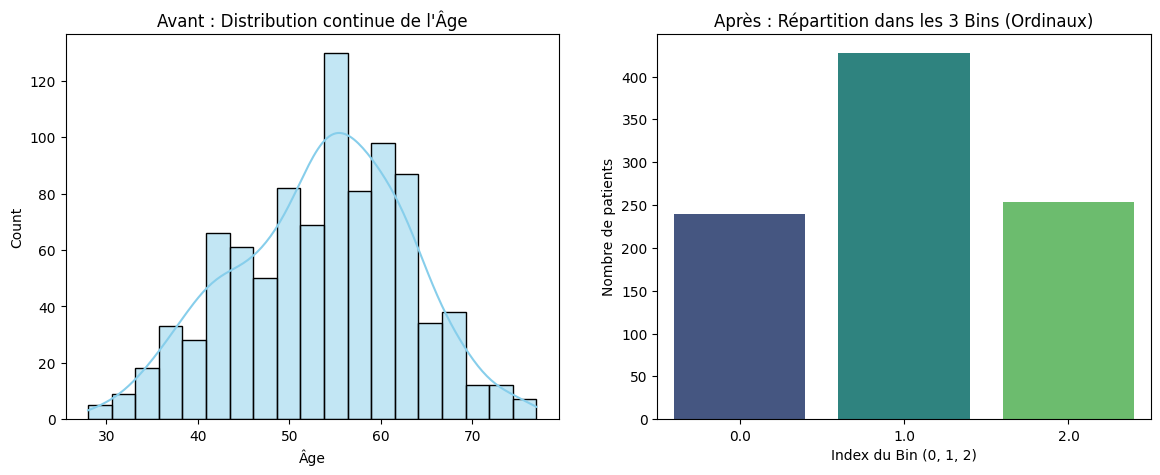

In [ ]:
# 5. Visualisation Avant / Après
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Graphique AVANT : Distribution continue
sns.histplot(df_imputed['remainder__age'], kde=True, color='skyblue', ax=ax1)
ax1.set_title('Avant : Distribution continue de l\'Âge')
ax1.set_xlabel('Âge')

# Graphique APRÈS : Distribution discrétisée
sns.countplot(x='age_bins', data=df_imputed, palette='viridis', ax=ax2)
ax2.set_title('Après : Répartition dans les 3 Bins (Ordinaux)')
ax2.set_xlabel('Index du Bin (0, 1, 2)')
ax2.set_ylabel('Nombre de patients')

**Structure vs Fréquence** :  
- À gauche, on voit la forme réelle (continue) : on remarque que l'âge ne suit
pas une ligne droite mais une courbe.

- À droite, on voitt la simplification (discrète) : K-Means a résumé cette courbe complexe en 3 profils types (ex: Jeunes, Moyens, Seniors).


**Les frontières (Edges)** : les creux ou les pentes raides sont les endroits où K-Means a probablement posé ses "ciseaux" (graphique de gauche).




# Partie 6 : Normalisation et Standardisation

####**MinMaxScaler - Normalisation dans [0, 1]**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sélection des colonnes numériques à normaliser/standardiser
numeric_cols_to_scale = ['remainder__trestbps', 'remainder__chol',
                         'remainder__thalch', 'remainder__oldpeak']

df_scaling = df_imputed[numeric_cols_to_scale].copy()

# Application du MinMaxScaler
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(minmax_scaler.fit_transform(df_scaling),
                         columns=[col + '_minmax' for col in numeric_cols_to_scale])

df_minmax.head()

,remainder__trestbps_minmax,remainder__chol_minmax,remainder__thalch_minmax,remainder__oldpeak_minmax
0,0.725,0.386401,0.633803,0.556818
1,0.800,0.474295,0.338028,0.465909
2,0.600,0.379768,0.485915,0.590909
3,0.650,0.414594,0.894366,0.693182
4,0.650,0.338308,0.788732,0.454545


####**StandardScaler - Standardisation (Z-score)**


In [ ]:
# Application du StandardScaler
standard_scaler = StandardScaler()
df_standard = pd.DataFrame(
    standard_scaler.fit_transform(df_scaling),
    columns=[col + '_standard' for col in numeric_cols_to_scale])

df_standard.head()

,remainder__trestbps_standard,remainder__chol_standard,remainder__thalch_standard,remainder__oldpeak_standard
0,0.690583,0.304062,0.485469,1.336316
1,1.500038,0.789624,-1.172119,0.583083
2,-0.658509,0.267416,-0.343325,1.618778
3,-0.118872,0.459808,1.945726,2.466164
4,-0.118872,0.038377,1.353730,0.488929


####**RobustScaler - Standardisation robuste**


In [ ]:
# Application du RobustScaler
robust_scaler = RobustScaler()
df_robust = pd.DataFrame(
    robust_scaler.fit_transform(df_scaling),
    columns=[col + '_robust' for col in numeric_cols_to_scale])

df_robust.head()

,remainder__trestbps_robust,remainder__chol_robust,remainder__thalch_robust,remainder__oldpeak_robust
0,0.75,0.110803,0.274725,1.133333
1,1.50,0.698061,-0.879121,0.600000
2,-0.50,0.066482,-0.302198,1.333333
3,0.00,0.299169,1.291209,1.933333
4,0.00,-0.210526,0.879121,0.533333


####**Comparaison**


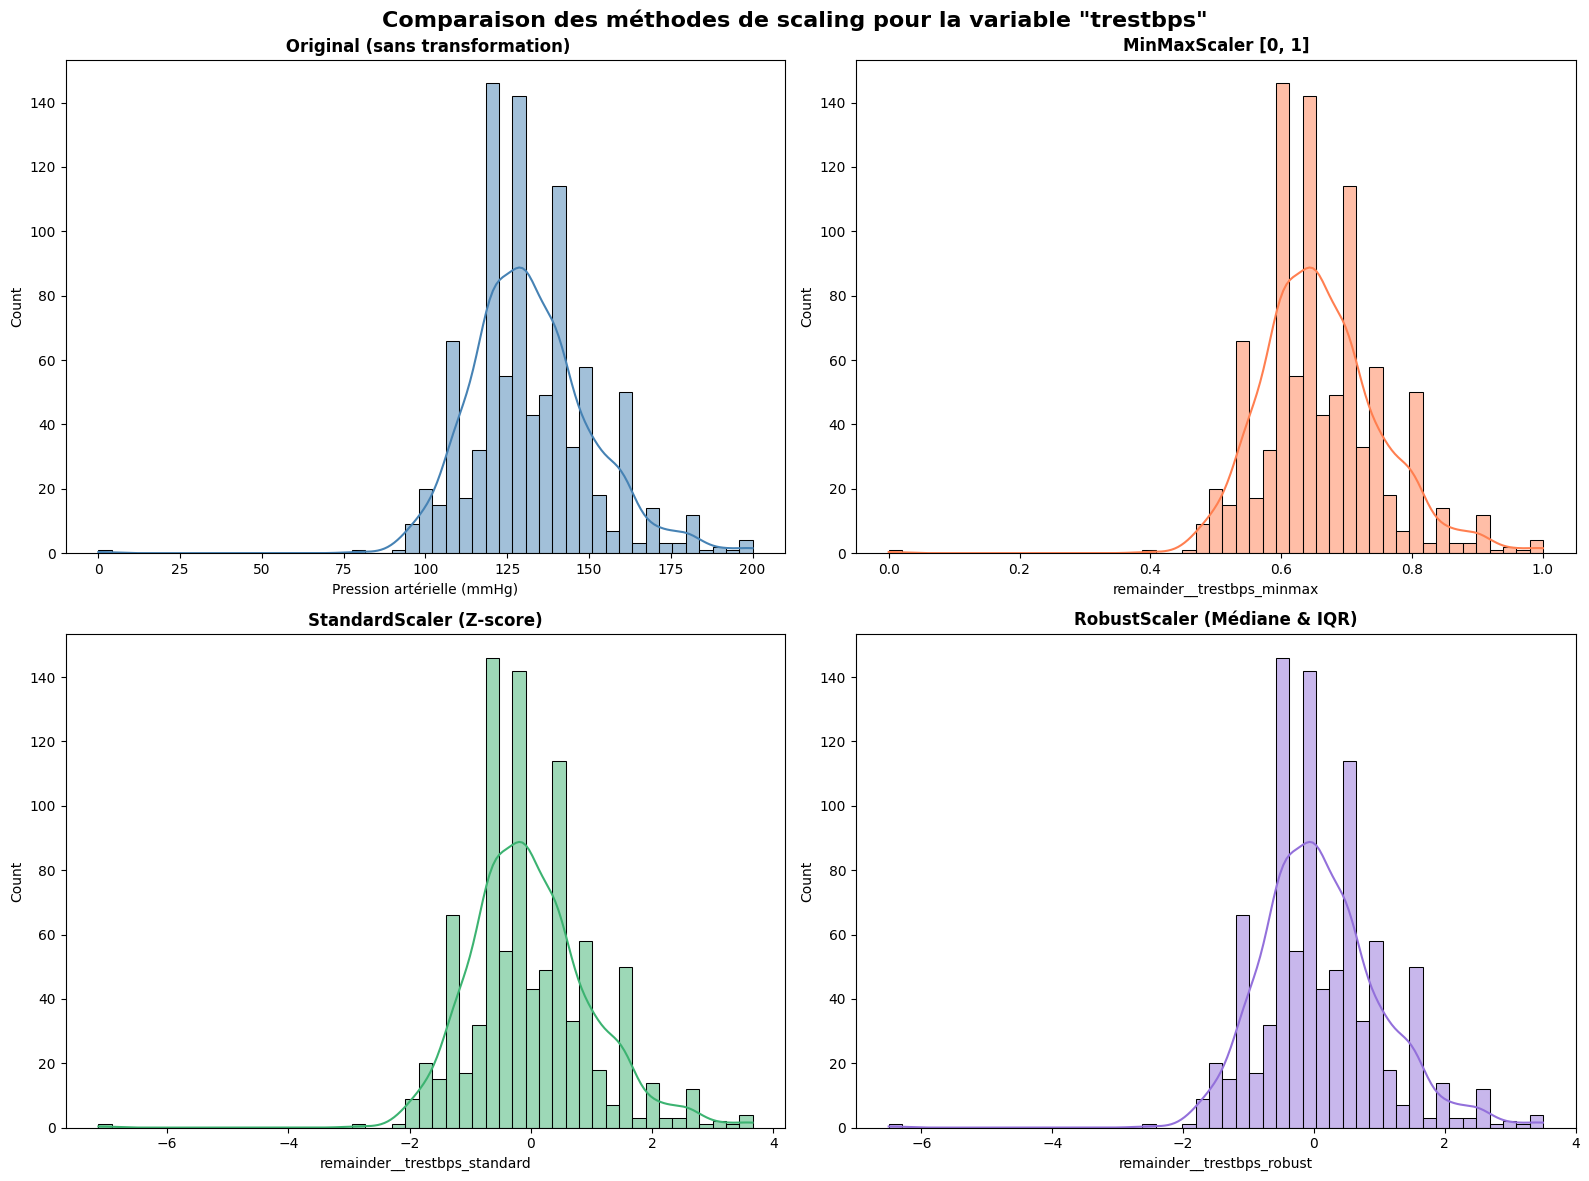

In [ ]:
# Création des graphiques de comparaison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparaison des méthodes de scaling pour la variable "trestbps"', fontsize=16, fontweight='bold')

# Graphique 1: Original
sns.histplot(df_scaling['remainder__trestbps'], kde=True, ax=axes[0, 0], color='steelblue')
axes[0, 0].set_title(' Original (sans transformation)', fontweight='bold')
axes[0, 0].set_xlabel('Pression artérielle (mmHg)')

# Graphique 2: MinMaxScaler
sns.histplot(df_minmax['remainder__trestbps_minmax'], kde=True, ax=axes[0, 1], color='coral')
axes[0, 1].set_title('MinMaxScaler [0, 1]', fontweight='bold')

# Graphique 3: StandardScaler
sns.histplot(df_standard['remainder__trestbps_standard'], kde=True, ax=axes[1, 0], color='mediumseagreen')
axes[1, 0].set_title('StandardScaler (Z-score)', fontweight='bold')

# Graphique 4: RobustScaler
sns.histplot(df_robust['remainder__trestbps_robust'], kde=True, ax=axes[1, 1], color='mediumpurple')
axes[1, 1].set_title('RobustScaler (Médiane & IQR)', fontweight='bold')

plt.tight_layout()
plt.savefig('comparaison_scalers.png', dpi=300)
plt.show()

####**Choix: RobustScaler**

**Raisons:**
1. Données médicales → Outliers sont des valeurs extrêmes réelles
2. Variables avec échelles différentes (pression vs cholestérol)
3. Robustesse nécessaire pour modèle de prédiction fiable
4. Les outliers peuvent être informatifs (cas pathologiques)


---


MinMaxScaler et StandardScaler seraient biaisés par les valeurs extrêmes
qui sont médicalement significatives dans ce contexte.

# Partie 7 : PowerTransformer

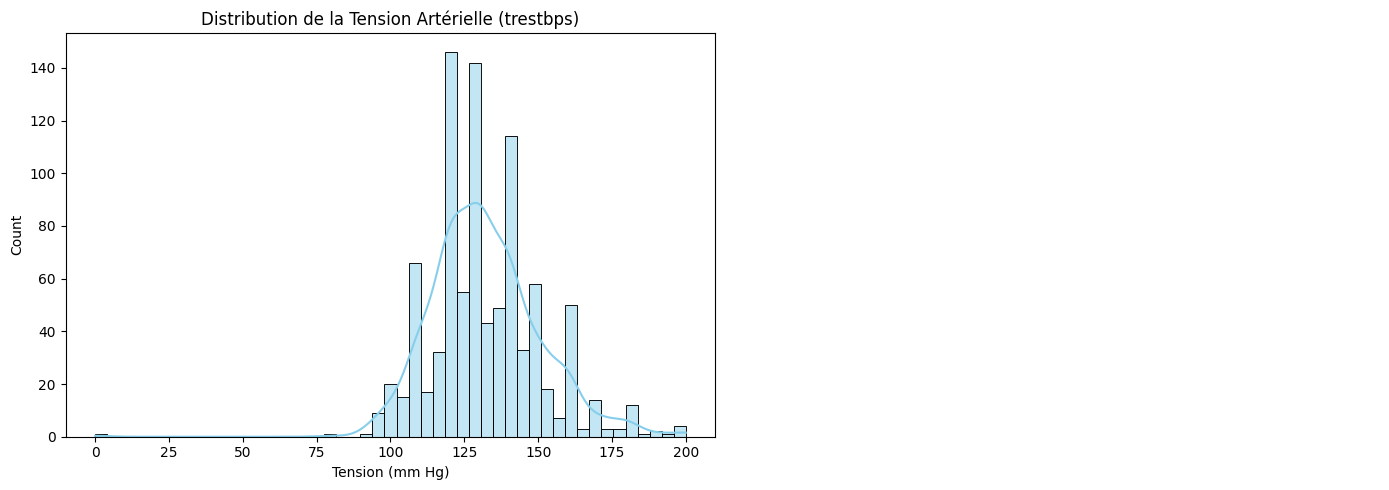

In [ ]:
# On recrée une nouvelle figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# On trace la nouvelle variable : trestbps
sns.histplot(df_imputed['remainder__trestbps'], kde=True, color='skyblue', ax=ax1)
ax1.set_title('Distribution de la Tension Artérielle (trestbps)')
ax1.set_xlabel('Tension (mm Hg)')

# On peut laisser le deuxième axe vide ou tracer autre chose
ax2.set_axis_off()

plt.tight_layout()
plt.show() # Force l'affichage immédiat dans le notebook


On remarque une présence de valeurs nulles qui tirent la distribution vers la gauche et dissipe les valeurs négatives.

In [ ]:
#df_imputed['remainder__trestbps'].min()

In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   nom__sex_Female          920 non-null    object 
 1   nom__sex_Male            920 non-null    object 
 2   nom__cp_asymptomatic     920 non-null    object 
 3   nom__cp_atypical angina  920 non-null    object 
 4   nom__cp_non-anginal      920 non-null    object 
 5   nom__cp_typical angina   920 non-null    object 
 6   nom__fbs_False           920 non-null    object 
 7   nom__fbs_True            920 non-null    object 
 8   nom__fbs_missing         920 non-null    object 
 9   nom__exang_False         920 non-null    object 
 10  nom__exang_True          920 non-null    object 
 11  nom__exang_missing       920 non-null    object 
 12  ord__restecg             920 non-null    object 
 13  ord__slope               920 non-null    object 
 14  ord__thal                9

In [ ]:
from sklearn.preprocessing import PowerTransformer

df_imputed['remainder__trestbps'] = df_imputed['remainder__trestbps'].astype('float64')
pt_yeo = PowerTransformer(method='yeo-johnson')

# pt_box = PowerTransformer(method="box-cox")
# Application (sur trestbps qui est > 0)
# df_imputed['trestbps_box'] = pt_box.fit_transform(df_imputed[['remainder__trestbps']])
df_imputed['trestbps_yeo'] = pt_yeo.fit_transform(df_imputed[['remainder__trestbps']])

Text(0.5, 1.0, 'Après Yeo-Johnson')

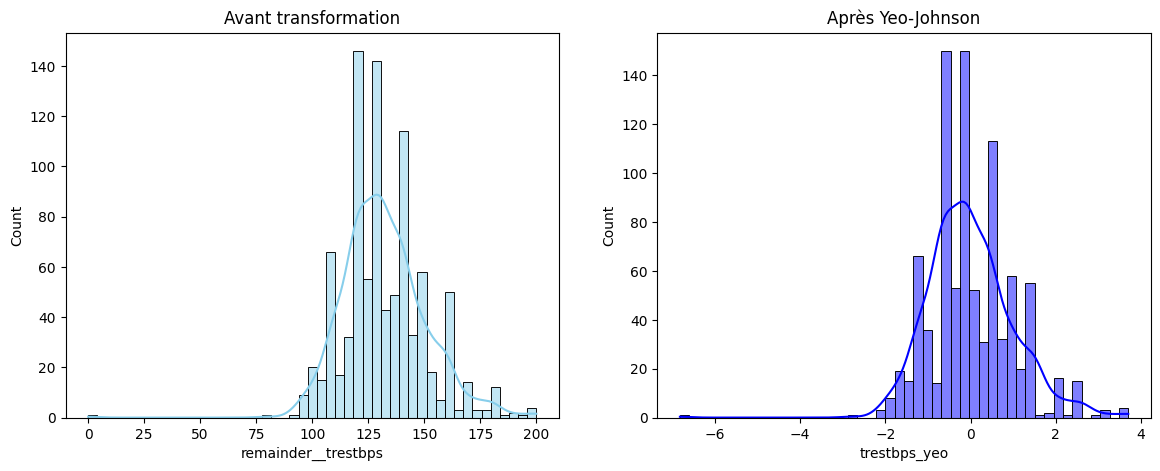

In [ ]:
# Visualisation pour comparer
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df_imputed['remainder__trestbps'], kde=True, color='skyblue', ax=ax1)
ax1.set_title('Avant transformation')


sns.histplot(df_imputed['trestbps_yeo'], kde=True, color='blue', ax=ax2)
ax2.set_title('Après Yeo-Johnson')

**Normalisation :**

Après Yeo-Johnson, la distribution s'est "recentrée". Elle ressemble beaucoup plus à une courbe de Gauss (loi normale).

On est passé de valeurs réelles (100 à 200) à des valeurs centrées autour de 0 avec un écart-type proche de 1. C'est parce que le PowerTransformer de Scikit-Learn applique automatiquement une standardisation après la transformation de puissance.


# Partie 8 : PolynomialFeatures

####**Sélection des variables**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Sélection des variables :
selected_features = ['remainder__age', 'remainder__trestbps', 'remainder__chol']

Ces variables ont été choisies car:
* Elles sont continues et numériques.
* Leurs interactions sont médicalement significatives.
*  Elles représentent des facteurs de risque cardiovasculaire.

####**Test avec des degrés différents**

Degré 2:
* Nombre de features originales: 3
* Nombre de features générées: 9
* Facteur de multiplication: ×3.0
* Nouvelles features:
  1. age
  2. trestbps
  3. chol
  4. age²
  5. age × trestbps
  6. age × chol
  7. trestbps²
  8. trestbps × chol
  9. chol²

Degré 3:
* Nombre de features originales: 3
* Nombre de features générées: 19
* Facteur de multiplication: ×6.3
* Inclut: termes cubiques + interactions à 3 variables


####**1. Application avec le degré 2**

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df_imputed[selected_features])
feature_names = poly.get_feature_names_out(selected_features)

# Création d'un DataFrame
df_poly = pd.DataFrame(X_poly, columns=feature_names)
display(df_poly.head())

,remainder__age,remainder__trestbps,remainder__chol,remainder__age^2,remainder__age remainder__trestbps,remainder__age remainder__chol,remainder__trestbps^2,remainder__trestbps remainder__chol,remainder__chol^2
0,63.0,145.0,233.0,3969.0,9135.0,14679.0,21025.0,33785.0,54289.0
1,67.0,160.0,286.0,4489.0,10720.0,19162.0,25600.0,45760.0,81796.0
2,67.0,120.0,229.0,4489.0,8040.0,15343.0,14400.0,27480.0,52441.0
3,37.0,130.0,250.0,1369.0,4810.0,9250.0,16900.0,32500.0,62500.0
4,41.0,130.0,204.0,1681.0,5330.0,8364.0,16900.0,26520.0,41616.0


####**2. Nouvelles variables générées**


---

```
Variables originales (3)
```
 1. remainder__age
 2. remainder__trestbps
 3. remainder__chol

**Features polynomiales générées (9):**
```
Features originales (3)
```
1. remainder__age
2. remainder__trestbps
3. remainder__chol
```
Termes quadratiques (3)
```
4. remainder__age²
7. remainder__trestbps²
9. remainder__chol²
```
Interactions (3)
```
5. remainder__age × remainder__trestbps
6. remainder__age × remainder__chol
8. remainder__trestbps × remainder__chol


####**3. Impact sur la dimension**

In [ ]:
df_poly.shape

(920, 9)

Le nombre de lignes est inchangé.

Après PolynomialFeatures:
- Features originales sélectionnées: 3
- Nouvelles features générées: 6
- Total features polynomiales: 9
- Augmentation: +200% (×3)

####**4. Justification du choix du degré 2**


---

1. Capture des interactions du 2ème ordre

   - Exemple: âge × pression artérielle
   - Signification: L'effet de la pression varie avec l'âge


2. Modélisation des relations non-linéaires simples
   - Exemple: âge²
   - Signification: Le risque cardiovasculaire augmente quadratiquement


3. Nombre de features raisonnable
   - 9 features au lieu de 3 (×3)
   - Vs degré 3: 19 features (×6.3)


4. Interprétabilité conservée
   - Facile de comprendre âge²
   - Difficile de comprendre âge³


5. Moins de risque d'overfitting
   - Moins de paramètres à estimer
   - Meilleure généralisation


# Partie 9 : Pipeline final

Le pipeline intègre:
1.  Imputation des valeurs manquantes
2.  Encodage des variables catégorielles
3.  Normalisation/Standardisation
4.  Modèle de classification


**Définition des types de colonnes**

In [ ]:
# Colonnes numériques continues
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Colonnes numériques discrètes
numeric_discrete = ['ca']

# Colonnes catégorielles nominales
categorical_nominal = ['sex', 'cp', 'fbs', 'exang', 'dataset']

# Colonnes catégorielles ordinales
categorical_ordinal = ['restecg', 'slope', 'thal']

# Ordre pour variables ordinales
restecg_order = [['missing', 'normal', 'st-t abnormality', 'lv hypertrophy']]
slope_order = [['missing', 'upsloping', 'flat', 'downsloping']]
thal_order = [['missing', 'normal', 'fixed defect', 'reversable defect']]

**Pipelines de transformation**

In [ ]:
from sklearn.pipeline import Pipeline

# 1. Pipeline pour variables numériques continues
numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),  # KNN pour préserver les relations
    ('scaler', RobustScaler())                # Robuste aux outliers
])

# 2. Pipeline pour variables numériques discrètes
numeric_discrete_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Mode
])

# 3. Pipeline pour variables catégorielles nominales
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OneHotEncoder())
])

# 4. Pipeline pour variables ordinales (restecg)
restecg_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder(categories=restecg_order))
])

# 5. Pipeline pour variables ordinales (slope)
slope_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder(categories=slope_order))
])

# 6. Pipeline pour variables ordinales (thal)
thal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoder', OrdinalEncoder(categories=thal_order))
])

**Assemblage avec ColumnTransformer**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('num_discrete', numeric_discrete_transformer, numeric_discrete),
        ('cat_nom', categorical_transformer, categorical_nominal),
        ('restecg', restecg_transformer, ['restecg']),
        ('slope', slope_transformer, ['slope']),
        ('thal', thal_transformer, ['thal'])
    ],
    remainder='drop'  # Supprime les colonnes non spécifiées
)

**Pipeline complet avec le modèle**

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=100,      # 100 arbres
        max_depth=10,          # Profondeur max pour éviter overfitting
        random_state=42,       # Reproductibilité
        class_weight='balanced' # Équilibrage des classes
    ))
])

**Entraînement et évaluation**

In [ ]:
# Préparation des données
X = df.drop('num', axis=1) # Use the original df with original column names
y = (df['num'] > 0).astype(int)  # Conversion binaire

# Conversion des colonnes booléennes en string pour gérer les types mixés avec 'missing' du SimpleImputer
X['fbs'] = X['fbs'].astype(str)
X['exang'] = X['exang'].astype(str)

# Division train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Entraînement
pipeline.fit(X_train, y_train)

# Évaluation
train_score = pipeline.score(X_train, y_train)
test_score = pipeline.score(X_test, y_test)

print(f'Score train: {train_score:.4f}')
print(f'Score test:  {test_score:.4f}')

# Prédictions
y_pred = pipeline.predict(X_test)

# Rapport de classification
print(classification_report(y_test, y_pred))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Validation croisée
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(f'CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})')

Score train: 0.9742
Score test:  0.8478
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        82
           1       0.86      0.87      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184

[[67 15]
 [13 89]]
CV Score: 0.8179 (+/- 0.0139)


**Visualisation de la matrice de confusion**

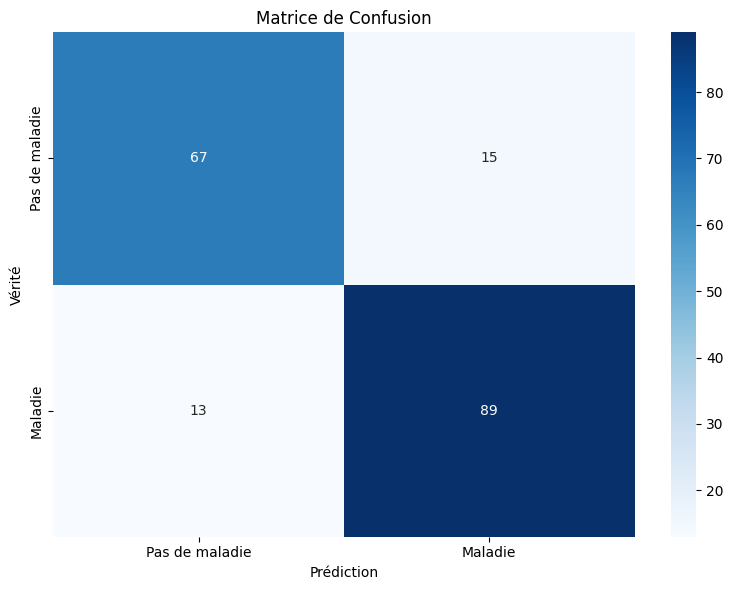

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pas de maladie', 'Maladie'],
            yticklabels=['Pas de maladie', 'Maladie'])
ax.set_xlabel('Prédiction')
ax.set_ylabel('Vérité')
ax.set_title('Matrice de Confusion')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300)
plt.show()

**Importance des features**

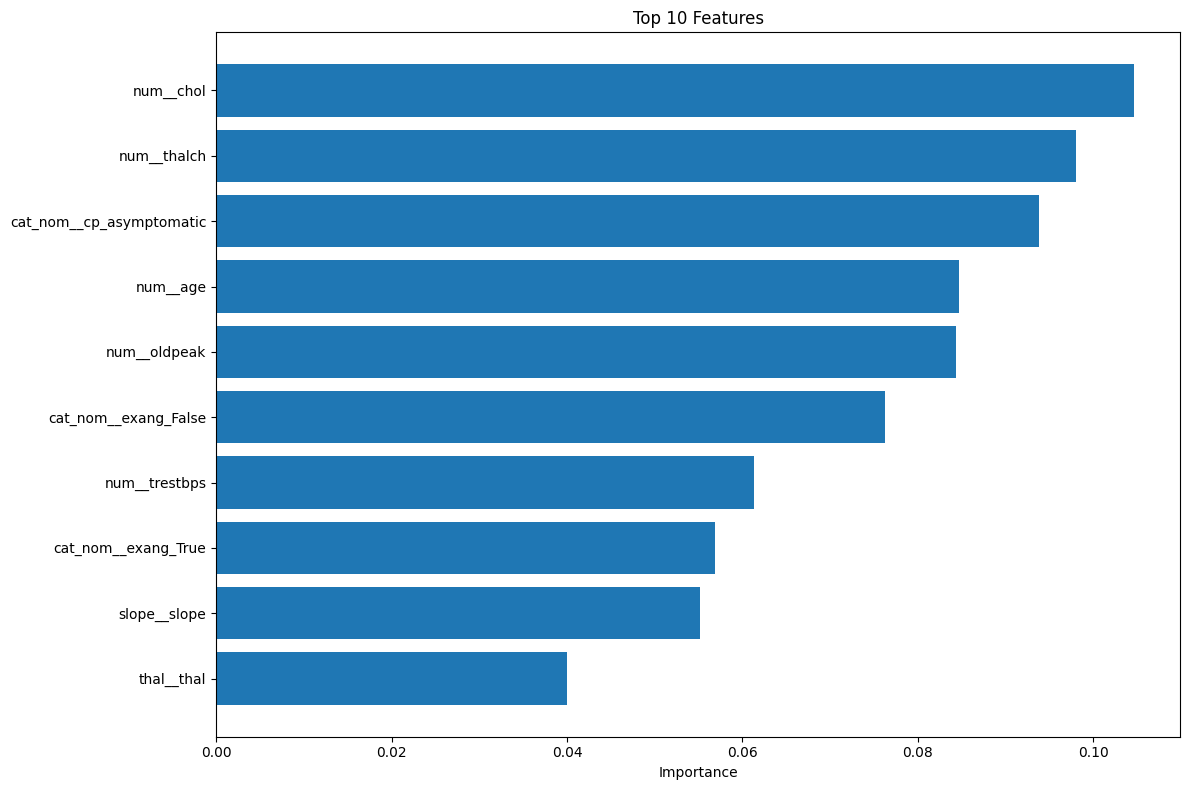

In [ ]:
#Récupération du modèle et des noms de features
rf_model = pipeline.named_steps['classifier']
feature_names = preprocessor.get_feature_names_out()
importances = rf_model.feature_importances_ # importance des features

# Tri par importance
indices = np.argsort(importances)[::-1]

# Visualisation
plt.figure(figsize=(12, 8))
top_n = 10
plt.barh(range(top_n), importances[indices[:top_n]])
plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]])
plt.xlabel('Importance')
plt.title('Top 10 Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()